<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT <br>Assignment 3 Part 2 [GROUP Assignment]</h1>

---
<br>

#### **Your Unis** : yz4691, qg2218.
#### **Your Full names** : Yuntian Zhang, Qingxuan Guo
#### **Your AI Model Share Usernames**: yz4691, qingxuanguo
#### **Link to your Public Github repository** : Fill here (single link is expected)
#### **Team member Contribution Percentages** : Fill here

## Stanford Sentiment Treebank - Movie Review Classification Competition


## **Instructions: [Total 85 Points for this part]**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
! pip install aimodelshare

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 k

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


## IMPORTANT NOTE
This X_test has no relation to test_sample.csv
This X_test (downloaded from above link) is for prediction and submission to aimodelshare only. You can create a validation split from the X_train here or during instatiating the model.

The test_sample.csv is meant for only inference from your best 3 saved models, and is only meant to be used in the final front-end notebook (See last section, Note that it has a very high weightage in this assignment). Predicting the labels in correct format on this test_sample may also require you to change your preprocessing and transform code. Ensure you code it correctly and that your final front-end notebook can predict on it appropriately.

None of the training code in this notebook will go into your python files in Github or your front-end notebook (See last cell instructions)

In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)


X_train=pd.read_csv("sst2_competition_data/X_train.csv")
X_test=pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv")

# Convert to series if your following preprocessor needs it
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# One hot encode encode Y data here
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
y_encoded = encoder.fit_transform(y_train_labels)
y_encoded = y_encoded.toarray()
X_train.head()

0    The Rock is destined to be the 21st Century 's...
1    The gorgeously elaborate continuation of `` Th...
2    Singer/composer Bryan Adams contributes a slew...
3                 Yet the act is still charming here .
4    Whether or not you 're enlightened by any of D...
Name: text, dtype: object

##2.   Preprocess data using keras tokenizer / Write and Save Preprocessor function


In [ ]:
# This preprocessor function makes use of the tf.keras tokenizer

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# [3 Pts]for this cell

# Build vocabulary from training text data
# preprocessor tokenizes words and makes sure all documents have the same length (perform padding with maxlen=40)

def preprocessor(txt_in):
    # Tokenize words
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(txt_in)
    sequences = tokenizer.texts_to_sequences(txt_in)

    padded_sequences = pad_sequences(sequences, maxlen=40, padding='post')
    return padded_sequences, tokenizer


# print(preprocessor(X_train).shape)
# print(preprocessor(X_test).shape)

In [ ]:
X_train_padded, tokenizer = preprocessor(X_train)
X_test_padded, _ = preprocessor(X_test)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

13836


##3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
# Plot history [1 Pts]
import matplotlib.pyplot as plt

def plot_history(history):
  # Plot training history
  plt.figure(figsize=(10, 5))

  # Plot training & validation loss values
  plt.subplot(1, 2, 1)
  plt.plot(history['loss'], label='Training Loss')
  plt.plot(history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 2)
  plt.plot(history['accuracy'], label='Training Accuracy')
  plt.plot(history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, Dropout
from tensorflow.keras.models import Sequential

# A basic deep learning model (max 5 layers)  # [1 Pts]
model_basicnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=40),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model_basicnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
import keras
checkpoint_filepath = '/content/best_basicnn.h5'
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3),
          keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)]
# Do validation split here.
np.random.seed(42)
history = model_basicnn.fit(X_train_padded, y_encoded, epochs=10, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
173/173 [==============================] - 18s 81ms/step - loss: 0.6634 - accuracy: 0.6127 - val_loss: 0.8902 - val_accuracy: 0.1488 - lr: 0.0010
Epoch 2/10
173/173 [==============================] - 13s 72ms/step - loss: 0.3943 - accuracy: 0.8179 - val_loss: 0.6562 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 3/10
173/173 [==============================] - 12s 67ms/step - loss: 0.0603 - accuracy: 0.9857 - val_loss: 0.9362 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 4/10
173/173 [==============================] - 10s 60ms/step - loss: 0.0141 - accuracy: 0.9980 - val_loss: 0.8407 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 5/10
173/173 [==============================] - 12s 70ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 1.1764 - val_accuracy: 0.6517 - lr: 0.0010
Epoch 6/10
173/173 [==============================] - 7s 42ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 1.1754 - val_accuracy: 0.6553 - lr: 1.0000e-04
Epoch 7/10
173/173 [==============================] - 9

In [ ]:
weights_path = '/content/basicnn_model_weights.h5'
model_basicnn.save_weights(weights_path)
from google.colab import files
files.download('basicnn_model_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

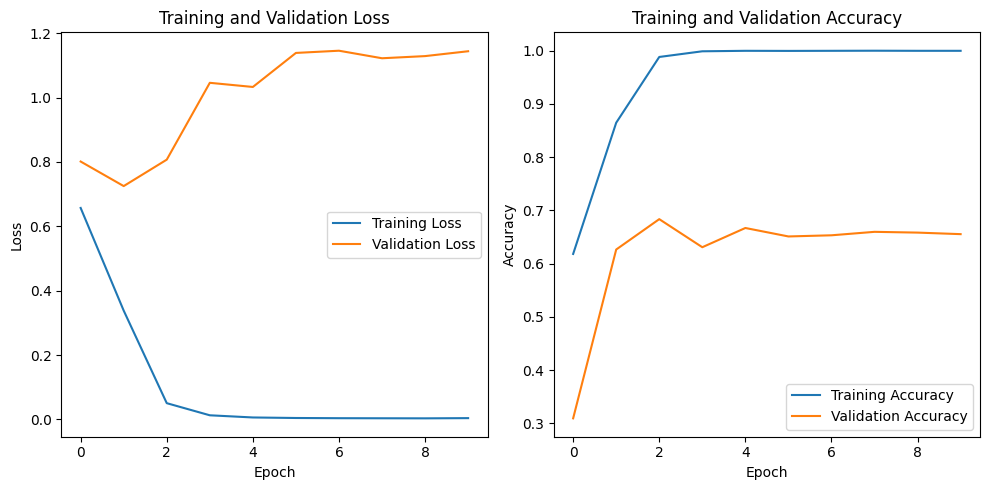

In [ ]:
plot_history(history.history)
pd.DataFrame(history.history).to_csv('training_history_basicnn.csv')

As seen in the training history plots, there're obvious signs of overfitting.
Two way to reduce overfitting:
1. Because the model only takes one epoch to converge, we've set a checkpoint to save the best model with lowest validation loss. We can also reduce epoch numeber.
2. add batch normalization and dropout layers in later models.

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_basicnn, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1:

# [1 Pts]

#-- Generate predicted y values on x_test (Model 1)


# extract correct prediction labels
prediction_labels = encoder.inverse_transform(model_basicnn.predict(preprocessor(X_test)))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 0s 5ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 507

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten

# Code an model with atleast 3 LSTM layers (with Embedding Layer) # [1 Pts]
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=40),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32, recurrent_dropout=0.5),
    Dense(2, activation='softmax')

])
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_filepath = '/content/best_lstm.h5'
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3),
          keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)]

np.random.seed(42)
history = model_lstm.fit(X_train_padded, y_encoded, epochs=10, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
173/173 [==============================] - 48s 239ms/step - loss: 0.6569 - accuracy: 0.6151 - val_loss: 0.7326 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 2/10
173/173 [==============================] - 35s 205ms/step - loss: 0.4457 - accuracy: 0.8118 - val_loss: 0.7069 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 3/10
173/173 [==============================] - 36s 209ms/step - loss: 0.2333 - accuracy: 0.9182 - val_loss: 0.9290 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 4/10
173/173 [==============================] - 34s 197ms/step - loss: 0.1477 - accuracy: 0.9545 - val_loss: 0.8013 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 5/10
173/173 [==============================] - 38s 222ms/step - loss: 0.0986 - accuracy: 0.9736 - val_loss: 0.9866 - val_accuracy: 0.7023 - lr: 0.0010
Epoch 6/10
173/173 [==============================] - 36s 209ms/step - loss: 0.0553 - accuracy: 0.9866 - val_loss: 0.8577 - val_accuracy: 0.7305 - lr: 1.0000e-04
Epoch 7/10
173/173 [============================

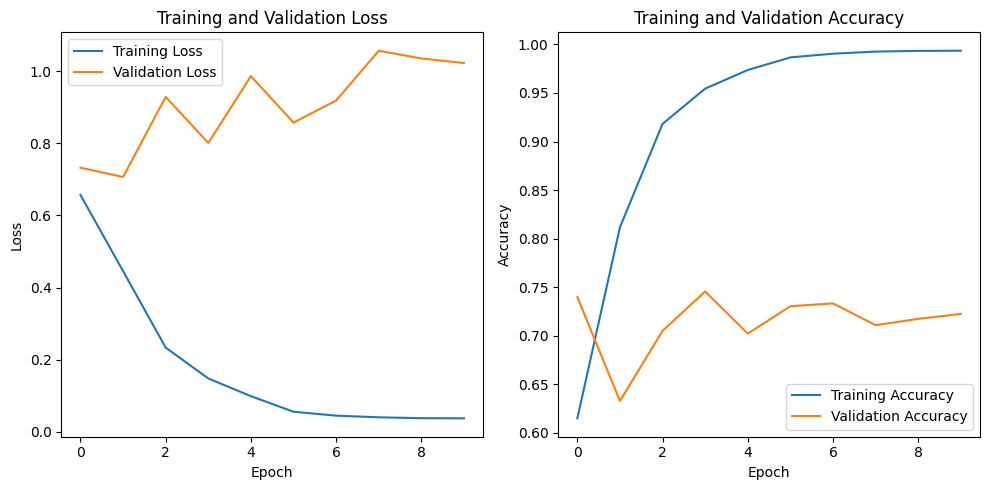

In [ ]:
# Plot history [1 Pts]
plot_history(history.history)

In [ ]:
# pd.DataFrame(history.history).to_csv('training_history_lstm.csv')

Does your model perform better or worse than your prior deep learning model? Why might that be the case?


---

Though there are still some signs of overfitting after the 6th epoch, the LSTM model is better than the basic NN model. It might be because the three gates of LSTM pick up memory, capture long-term dependencies and assist back propagation in gradient boosting. Therefore, the LSTM model can adjust itself based on more accurate gradient information flowing through the gates.

In [ ]:
# Save keras model to local ONNX file
from tensorflow.keras.models import load_model
# model_lstm = load_model('best_lstm.h5')

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_lstm, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2:


# extract correct prediction labels
prediction_labels = encoder.inverse_transform(model_lstm.predict(preprocessor(X_test)))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model2 = "model2.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([1, 2], verbose=1)
mycompetition.stylize_compare(data)

## Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [ ]:
! pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
#Separate validation data here
from sklearn.model_selection import train_test_split
x_train_split, x_val, y_train_split, y_val = train_test_split(
     X_train, y_train_labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
import keras_tuner as kt

# Define model structure & parameter search space with a function
# code LSTM--based model with provision for searching hyperparameter space, return model  # [3 Pts]
def build_model(hp):
  model_tuned = Sequential([
      Embedding(input_dim=vocab_size, output_dim=200, input_length=40),
      LSTM(units=hp.Int("units", min_value=32, max_value=128, step=16),
           recurrent_dropout=hp.Float("recurrent_dropout", min_value=0, max_value=0.5, step=0.25),
           return_sequences=True),
      LSTM(units=hp.Int("units", min_value=32, max_value=128, step=16),
           recurrent_dropout=hp.Float("recurrent_dropout", min_value=0, max_value=0.5, step=0.25),
           return_sequences=True),
      LSTM(units=hp.Int("units", min_value=32, max_value=128, step=16),
           recurrent_dropout=hp.Float("recurrent_dropout", min_value=0, max_value=0.5, step=0.25)),
      Dense(2, activation='softmax')
  ])
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  model_tuned.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      loss="binary_crossentropy",
      metrics=["accuracy"],
  )

  return model_tuned

build_model(kt.HyperParameters())

In [ ]:
import tensorflow as tf
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="/content/",
    project_name="nn_tuned",
)

x_train_split_padded, _ = preprocessor(x_train_split)
x_val_padded, _ = preprocessor(x_val)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(x_train_split_padded, encoder.fit_transform(y_train_split).toarray(),
             epochs=10, validation_data=(x_val_padded, encoder.fit_transform(y_val).toarray()),
             callbacks=[stop_early])
tuner.search_space_summary()

Trial 3 Complete [00h 04m 27s]
val_loss: 0.6913886368274689

Best val_loss So Far: 0.6887591183185577
Total elapsed time: 00h 21m 21s
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
recurrent_dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.25, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
# [3 Pts]
# Get the top 2 hyperparameters.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
second_model = models[1]
best_model.save('best_tuned.h5')
second_model.save('second_best_tuned.h5')

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           2767200   
                                                                 
 lstm (LSTM)                 (None, 40, 96)            114048    
                                                                 
 lstm_1 (LSTM)               (None, 40, 96)            74112     
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dense (Dense)               (None, 2)                 194       
                                                                 
Total params: 3029666 (11.56 MB)
Trainable params: 3029666 (11.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
second_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           2767200   
                                                                 
 lstm (LSTM)                 (None, 40, 32)            29824     
                                                                 
 lstm_1 (LSTM)               (None, 40, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 2813730 (10.73 MB)
Trainable params: 2813730 (10.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tuner.results_summary()

Results summary
Results in /content/nn_tuned
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
units: 96
recurrent_dropout: 0.0
lr: 0.007764669056757976
Score: 0.6887591183185577

Trial 2 summary
Hyperparameters:
units: 32
recurrent_dropout: 0.0
lr: 0.00010450278707454006
Score: 0.6913886368274689

Trial 1 summary
Hyperparameters:
units: 96
recurrent_dropout: 0.5
lr: 0.0008334295734522584
Score: 0.7351420521736145


In [ ]:
# Build the model with the best hp.
model_tuned_best = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=40),
    LSTM(96, recurrent_dropout=0.5, return_sequences=True),
    LSTM(96, recurrent_dropout=0.5, return_sequences=True),
    LSTM(96, recurrent_dropout=0.5),
    Dense(2, activation='softmax')
])
learning_rate = 0.0008334295734522584
model_tuned_best.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

checkpoint_filepath = '/content/best_ktuner.h5'
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3),
          keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)]

history = model_tuned_best.fit(X_train_padded, y_encoded, epochs=10, validation_split=0.2, callbacks=callbacks_list)



Epoch 1/10
173/173 [==============================] - 55s 276ms/step - loss: 0.6068 - accuracy: 0.6750 - val_loss: 0.7615 - val_accuracy: 0.6539 - lr: 8.3343e-04
Epoch 2/10
173/173 [==============================] - 45s 258ms/step - loss: 0.3320 - accuracy: 0.8698 - val_loss: 0.6753 - val_accuracy: 0.6221 - lr: 8.3343e-04
Epoch 3/10
173/173 [==============================] - 45s 261ms/step - loss: 0.1568 - accuracy: 0.9483 - val_loss: 0.6907 - val_accuracy: 0.7616 - lr: 8.3343e-04
Epoch 4/10
173/173 [==============================] - 46s 263ms/step - loss: 0.0945 - accuracy: 0.9707 - val_loss: 0.8322 - val_accuracy: 0.7009 - lr: 8.3343e-04
Epoch 5/10
173/173 [==============================] - 44s 253ms/step - loss: 0.0841 - accuracy: 0.9774 - val_loss: 1.1444 - val_accuracy: 0.6871 - lr: 8.3343e-04
Epoch 6/10
173/173 [==============================] - 44s 257ms/step - loss: 0.0387 - accuracy: 0.9902 - val_loss: 1.1697 - val_accuracy: 0.6944 - lr: 8.3343e-05
Epoch 7/10
173/173 [========

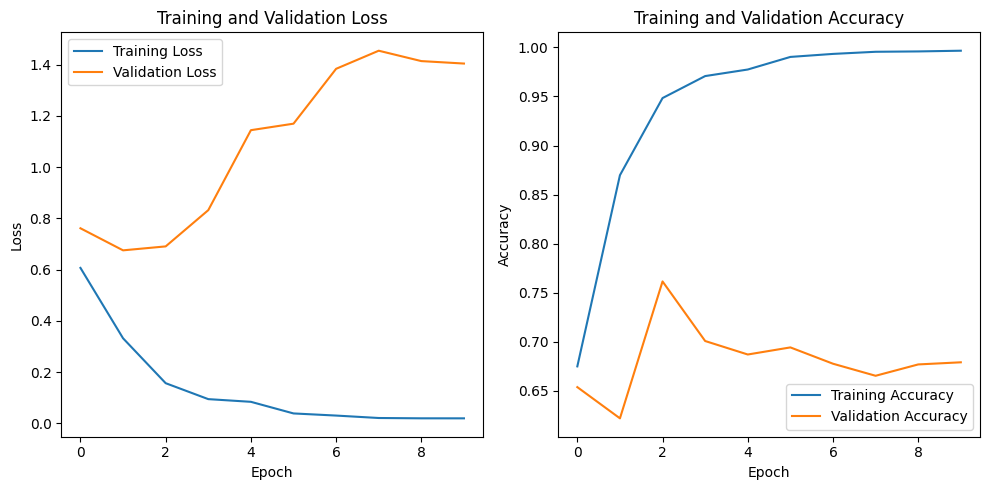

In [ ]:
plot_history(history.history)
pd.DataFrame(history.history).to_csv('training_history_ktuner.csv')

What were the best hyperparameters found? Why might that be performing better than others?

---

The best hyperparameters are: units=32, recurrent_dropout=0.5 and lr≈8.3e-3.
* Units: because the data is small and the task is simple, so it only takes a small amount of nodes to perform the task.
* Recurrent_dropout: because the data is small, even if we only used 32 nodes per layer, there is still going to be overfitting. So dropout is added to each layer to alleviate overfitting.
* Learning rate: the learning rate tuner chooses is relatively small in the [1e-4, 1e-2] range. This can still boil down to small dataset. Small parameter space doesn't require big lr to search it. Instead, smaller lr can better find minimum.

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_tuned_best, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("tuned_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted y values (Model 3)
# extract correct prediction labels
prediction_labels = encoder.inverse_transform(model_tuned_best.predict(preprocessor(X_test)))

mycompetition.submit_model(model3 = "tuned_model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([1, 2, 3], verbose=1)
mycompetition.stylize_compare(data)

## 3 more models [30 Pts]

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model [ 2 Pts]

○ Use Transfer learning with Glove Embeddings for 2nd model [10 Pts]

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related) [10 Pts]

In [ ]:
# Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


model_conv1d = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=40),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


model_conv1d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_filepath = '/content/best_conv1d.h5'
callbacks_list_conv1d = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)
]

history_conv1d = model_conv1d.fit(X_train_padded, y_encoded, epochs=10, validation_split=0.2, callbacks=callbacks_list_conv1d)



Epoch 1/10
173/173 [==============================] - 15s 77ms/step - loss: 0.6265 - accuracy: 0.6427 - val_loss: 0.5346 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 2/10
173/173 [==============================] - 15s 86ms/step - loss: 0.3191 - accuracy: 0.8642 - val_loss: 0.6069 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 3/10
173/173 [==============================] - 15s 88ms/step - loss: 0.0665 - accuracy: 0.9812 - val_loss: 0.8134 - val_accuracy: 0.7103 - lr: 0.0010
Epoch 4/10
173/173 [==============================] - 19s 110ms/step - loss: 0.0128 - accuracy: 0.9978 - val_loss: 1.0183 - val_accuracy: 0.7110 - lr: 0.0010
Epoch 5/10
173/173 [==============================] - 18s 107ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 1.0431 - val_accuracy: 0.7052 - lr: 1.0000e-04
Epoch 6/10
173/173 [==============================] - 13s 77ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 1.0537 - val_accuracy: 0.7038 - lr: 1.0000e-04
Epoch 7/10
173/173 [============================

In [ ]:
history_conv1d_df = pd.DataFrame(history_conv1d.history)
history_conv1d_df.to_csv('history_conv1d.csv', index=False)
from google.colab import files
files.download('history_conv1d.csv')
files.download('best_conv1d.h5')


from tensorflow.keras.models import load_model
best_conv1d = load_model('best_conv1d.h5')

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(best_conv1d, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_labels = encoder.inverse_transform(best_conv1d.predict(X_test_padded))

mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

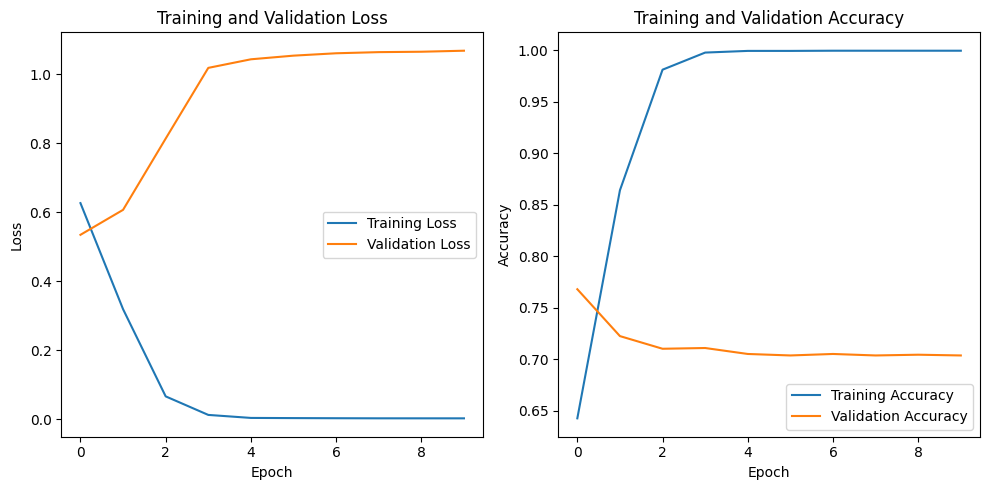

In [ ]:
history_conv1d = pd.read_csv('history_conv1d.csv')
plot_history(history_conv1d)
# # Save keras model to local ONNX file
# from aimodelshare.aimsonnx import model_to_onnx

# onnx_model = model_to_onnx(model_lstm, framework='keras',
#                           transfer_learning=False,
#                           deep_learning=True)

# with open("model2.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())
# #Submit Model 2:


# # extract correct prediction labels
# prediction_labels = encoder.inverse_transform(model_lstm.predict(preprocessor(X_test)))

# # Submit Model 2 to Competition Leaderboard
# mycompetition.submit_model(model2 = "model2.onnx",
#                                  preprocessor="preprocessor.zip",
#                                  prediction_submission=prediction_labels)

In [ ]:
# Model 2
import os
import zipfile
import urllib.request

url = "http://nlp.stanford.edu/data/glove.6B.zip"
filename = 'glove.6B.zip'
filepath = os.path.join('./', filename)
if not os.path.isfile(filepath):
    print('Download GloVe embeddings')
    urllib.request.urlretrieve(url, filename)
    print('Download completed.')


In [ ]:
#unzip
if not os.path.isdir('./glove.6B'):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        print('Extracting GloVe embeddings...')
        zip_ref.extractall('./glove.6B')
        print('Extraction completed.')


In [ ]:
from google.colab import files
files.download('glove.6B/glove.6B.200d.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model 2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

def load_glove_embeddings(path, embedding_dim):
    embeddings_index = {}
    with open(path) as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings('./glove.6B/glove.6B.200d.txt', 200)

embedding_matrix = np.zeros((vocab_size, 200))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# model with GloVe embeddings
model_with_glove = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=40, weights=[embedding_matrix], trainable=False),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model_with_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_filepath = '/content/best_glove.h5'
callbacks_list_glove = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)
]

history_glove = model_with_glove.fit(X_train_padded, y_encoded, epochs=10, validation_split=0.2, callbacks=callbacks_list_glove)





Epoch 1/10
173/173 [==============================] - 5s 24ms/step - loss: 0.6017 - accuracy: 0.6584 - val_loss: 0.5896 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 2/10
173/173 [==============================] - 4s 21ms/step - loss: 0.4323 - accuracy: 0.8018 - val_loss: 0.3504 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 3/10
173/173 [==============================] - 5s 27ms/step - loss: 0.3050 - accuracy: 0.8703 - val_loss: 0.9254 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 4/10
173/173 [==============================] - 6s 36ms/step - loss: 0.1763 - accuracy: 0.9368 - val_loss: 0.6971 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 5/10
173/173 [==============================] - 6s 37ms/step - loss: 0.1110 - accuracy: 0.9588 - val_loss: 0.6959 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 6/10
173/173 [==============================] - 6s 35ms/step - loss: 0.0466 - accuracy: 0.9870 - val_loss: 1.0294 - val_accuracy: 0.7486 - lr: 1.0000e-04
Epoch 7/10
173/173 [==============================] - 6s 35m

In [ ]:
weights_path = '/content/glove_model_weights.h5'
model_with_glove.save_weights(weights_path)
from google.colab import files
files.download('glove_model_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
history_glove_df = pd.DataFrame(history_glove.history)
history_glove_df.to_csv('history_glove.csv', index=False)
from google.colab import files
files.download('history_glove.csv')
files.download('best_glove.h5')


from tensorflow.keras.models import load_model
best_glove = load_model('best_glove.h5')

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(best_glove, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_labels = encoder.inverse_transform(best_glove.predict(X_test_padded))

mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

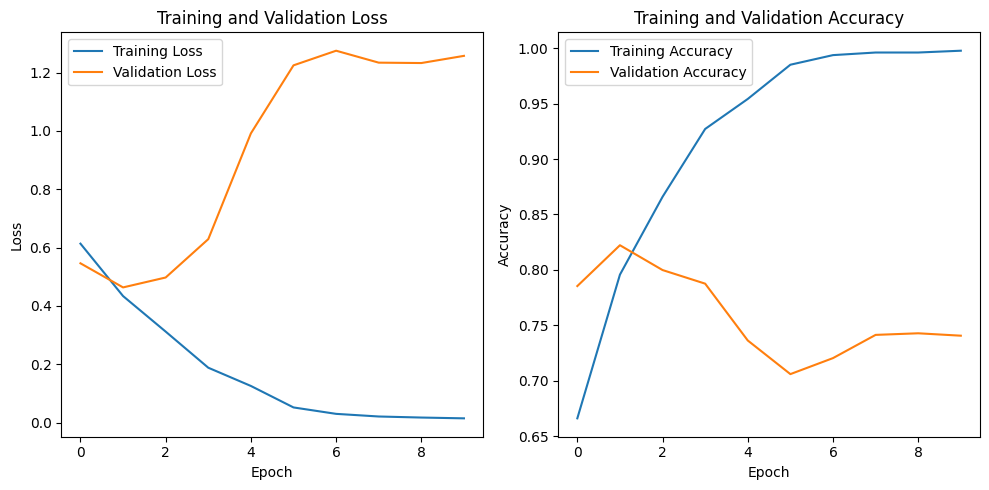

In [ ]:
history_glove = pd.read_csv('history_glove.csv')
plot_history(history_glove)

In [ ]:
# Model 3
! pip install transformers==4.37.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

max_length = 128
# Data preparation function
def prepare_data_bert(texts, tokenizer, max_length):
    tokenized = tokenizer(texts, max_length=max_length, truncation=True, padding='max_length', return_tensors="tf")
    return {
        'input_ids': tokenized['input_ids'],
        'attention_mask': tokenized['attention_mask']
    }
X_train_bert=pd.read_csv("sst2_competition_data/X_train.csv")['text'].to_list()
# X_train_bert = [[text] for text in X_train_bert]
train_data = prepare_data_bert(X_train_bert, tokenizer, max_length)
y_encoded_bert = np.array([[i][0][0] for i in y_encoded])


In [ ]:
# Freeze BERT layers
for layer in bert.layers:
    layer.trainable = False

# Model configuration
input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")
outputs = bert(input_ids, attention_mask=attention_mask)
embeddings = outputs.pooler_output

sequence_output = outputs.last_hidden_state[:, 0, :]  # First token ([CLS])


# Additional layers
# x = Dropout(0.5)(embeddings)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x)
# output = Dense(1, activation='sigmoid')(x)

output = Dense(1, activation='sigmoid')(sequence_output)


# Model compilation
model_bert = Model(inputs=[input_ids, attention_mask], outputs=output)
model_bert.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_bert.summary()



# Callbacks configuration
checkpoint_filepath = '/content/best_bert.h5'
callbacks_list_bert = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)
]


# Model training
history_bert = model_bert.fit(
    train_data,
    y_encoded_bert,
    epochs=5,
    validation_split=0.2,
    callbacks=callbacks_list_bert
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

In [ ]:
history_bert_df = pd.DataFrame(history_bert.history)
history_bert_df.to_csv('history_bert.csv', index=False)
weights_path = '/content/bert_model_weights.h5'
model_bert.save_weights(weights_path)
from google.colab import files
files.download('history_bert.csv')
files.download('best_bert.h5')
files.download('bert_model_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

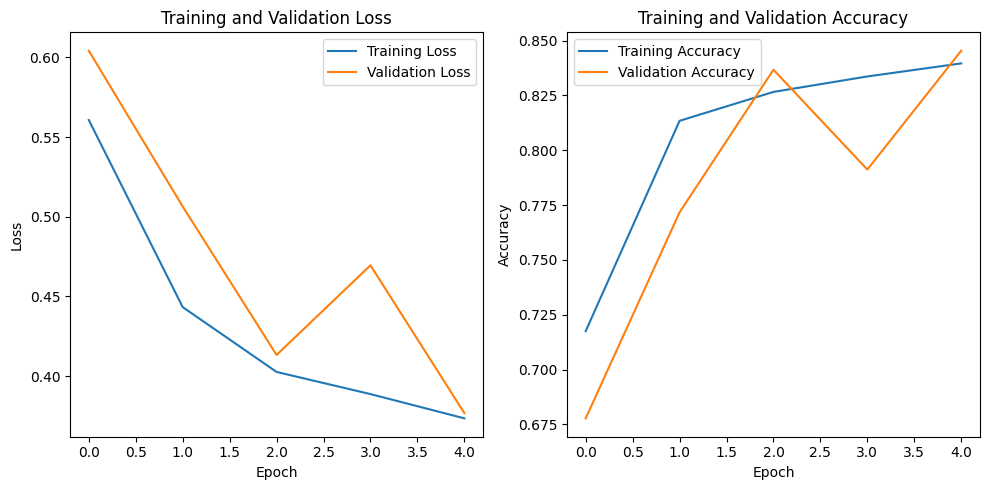

In [ ]:
history_bert = pd.read_csv('history_bert.csv')
plot_history(history_bert)

### Extra credits : Train any models of your choice [+10 Extra Points]

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
#Separate validation data here
from sklearn.model_selection import train_test_split
x_train_split, x_val, y_train_split, y_val = train_test_split(
     X_train, y_train_labels, test_size=0.2, random_state=42)

In [ ]:
# Any modern models of your choice (should be released after BERT)
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments
import torch


# Step 2: Preprocessing
tokenizer = T5Tokenizer.from_pretrained("t5-base")
train_data = [{"text": text, "label": label} for text, label in zip(x_train_split, y_train_split.squeeze())]
val_data = [{"text": text, "label": label} for text,label in zip(x_val, y_val.squeeze())]
def preprocess_data(data):
    tokenized_data = []
    for item in data:
        text = item["text"]
        sentiment = item["label"]
        tokenized_text = tokenizer.encode_plus(
            f"{text}",
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        tokenized_data.append(
            {
                "input_ids": tokenized_text["input_ids"].flatten(),
                "attention_mask": tokenized_text["attention_mask"].flatten(),
                "labels": torch.tensor(1 if sentiment == "positive" else 0).unsqueeze(0),
            }
        )
    return tokenized_data

train_tokenized = preprocess_data(train_data)
val_tokenized = preprocess_data(val_data)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:

# Step 3: Model Architecture
class SentimentClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = T5ForConditionalGeneration.from_pretrained("t5-base")

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
        )
        return outputs.loss, outputs.logits

model = SentimentClassifier()

# Step 4: Training
training_args = TrainingArguments(
    output_dir="./",
    num_train_epochs=1,
    # per_device_train_batch_size=8,
    # per_device_eval_batch_size=8,
    save_steps = 2000,
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="steps",
    load_best_model_at_end=True,
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
)


trainer.train()

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Step,Training Loss,Validation Loss
100,3.470300,0.000083
200,0.008400,0.000001
300,0.004700,0.000000
400,0.000100,0.000000
500,0.004900,0.000000
600,0.000000,0.000000


TrainOutput(global_step=692, training_loss=0.5041436982069251, metrics={'train_runtime': 982.084, 'train_samples_per_second': 5.637, 'train_steps_per_second': 0.705, 'total_flos': 0.0, 'train_loss': 0.5041436982069251, 'epoch': 1.0})

In [ ]:
import pandas as pd
history = pd.DataFrame(trainer.state.log_history)
history.to_csv('history_t5.csv', index=False)

In [ ]:
history

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,3.4703,1.423561e-03,0.000043,0.144509,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.144509,100,8.315918e-05,55.7200,24.839,3.105,NaN,NaN,NaN,NaN,NaN
2,0.0084,3.203743e+00,0.000036,0.289017,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.289017,200,5.746297e-07,55.5421,24.918,3.115,NaN,NaN,NaN,NaN,NaN
4,0.0047,3.430578e-06,0.000028,0.433526,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.433526,300,8.294425e-08,55.6446,24.872,3.109,NaN,NaN,NaN,NaN,NaN
6,0.0001,2.883792e-05,0.000021,0.578035,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,0.578035,400,8.346090e-08,55.6758,24.858,3.107,NaN,NaN,NaN,NaN,NaN
8,0.0049,4.454511e-05,0.000014,0.722543,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.722543,500,4.254944e-08,55.6512,24.869,3.109,NaN,NaN,NaN,NaN,NaN


In [ ]:
model.model.save_pretrained('/content/best_t5')

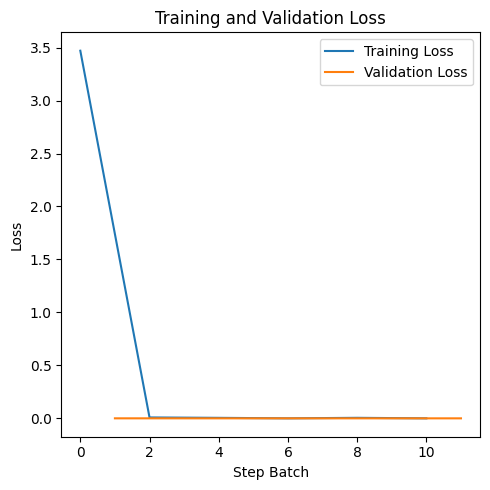

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.plot(history['loss'].dropna(), label='Training Loss')
plt.plot(history['eval_loss'].dropna(), label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Step Batch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

Tabularize results from ALL your models in this notebook and compare performance [5 Pts]

In [ ]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=Warning)
test_sample = pd.read_csv("test_sample.csv")
X_test_sample = test_sample['review']
y_test_sample = np.array(test_sample['sentiment']).reshape(-1, 1)
y_test_sample = test_sample[['sentiment']]
# One hot encode encode Y data here
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
y_test_sample_encoded = encoder.fit_transform(y_test_sample)
y_test_sample_encoded = y_test_sample_encoded.toarray()

X_test_sample_DL, tokenizer = preprocessor(X_test_sample)
X_test_sample_DL

array([[ 497, 1182, 1181, ...,  114,  834, 1185],
       [1983, 1984, 1985, ..., 1996,   96,  317],
       [  77,    2,  367, ...,   52,   15,  426],
       ...,
       [  43,   36,  149, ...,   21,  315,  172],
       [  51,  482,   51, ...,   23,  617,  135],
       [  10,   19,  295, ...,  421,    4, 4863]], dtype=int32)

In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

max_length = 128
# Data preparation function
def prepare_data_bert(texts, tokenizer, max_length):
    tokenized = tokenizer(texts, max_length=max_length, truncation=True, padding='max_length', return_tensors="tf")
    return {
        'input_ids': tokenized['input_ids'],
        'attention_mask': tokenized['attention_mask']
    }
X_test_sample_bert = test_sample['review'].to_list()
X_test_sample_bert_data = prepare_data_bert(X_test_sample_bert, tokenizer, max_length)
y_test_sample_encoded_bert = np.array([[i][0][0] for i in y_test_sample_encoded])
y_test_sample_encoded_bert


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.])

In [ ]:
# preprocessing test data for t5 model
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments
import torch

# Step 2: Preprocessing
tokenizer = T5Tokenizer.from_pretrained("t5-base")
def preprocess_data(data):
    tokenized_data = []
    for item in data:
        text = item["text"]
        sentiment = item["label"]
        tokenized_text = tokenizer.encode_plus(
            f"{text}",
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        tokenized_data.append(
            {
                "input_ids": tokenized_text["input_ids"].flatten(),
                "attention_mask": tokenized_text["attention_mask"].flatten(),
                "labels": torch.tensor(1 if sentiment == "positive" else 0).unsqueeze(0),
            }
        )
    return tokenized_data

X_test_sample_T5 = [{"text": text, "label": label} for text, label in zip(X_test_sample, test_sample[['sentiment']].squeeze())]
train_tokenized_T5 = preprocess_data(X_test_sample_T5)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from tensorflow.keras.models import load_model
import transformers

model_cnn = load_model('best_basicnn.h5')
model_bert = tf.keras.models.load_model('best_bert.h5', custom_objects={"TFBertModel": transformers.TFBertModel})
model_conv1d = load_model('best_conv1d.h5')
model_glove = load_model('best_glove.h5')
model_ktuner = load_model('best_ktuner.h5')
model_lstm = load_model('best_lstm.h5')

In [ ]:
# Evaluate on test sample data
cnn_score = model_cnn.evaluate(X_test_sample_DL, y_test_sample_encoded, verbose=0)
bert_score = model_bert.evaluate(X_test_sample_bert_data, y_test_sample_encoded_bert, verbose=0)
conv1d_score = model_conv1d.evaluate(X_test_sample_DL, y_test_sample_encoded, verbose=0)
glove_score = model_glove.evaluate(X_test_sample_DL, y_test_sample_encoded, verbose=0)
ktuner_score = model_ktuner.evaluate(X_test_sample_DL, y_test_sample_encoded, verbose=0)
lstm_score = model_lstm.evaluate(X_test_sample_DL, y_test_sample_encoded, verbose=0)

In [ ]:
# tabulate the results
results = pd.DataFrame({
    'Model': ['CNN', 'bert', 'conv1d', 'glove', 'ktuner', 'lstm'],
    'Test Loss': [cnn_score[0], bert_score[0], conv1d_score[0], glove_score[0], ktuner_score[0], lstm_score[0]],
    'Test Accuracy': [cnn_score[1], bert_score[1], conv1d_score[1], glove_score[1], ktuner_score[1], lstm_score[1]]
})

print(results)

    Model  Test Loss  Test Accuracy
0     CNN   1.225108       0.444444
1    bert   0.413761       0.757576
2  conv1d   1.023822       0.505050
3   glove   1.151374       0.414141
4  ktuner   1.196877       0.454545
5    lstm   1.467752       0.505050


In [ ]:
t5_predictions = trainer.predict(train_tokenized_T5)
# Mapping dictionary
mapping = {0: "negative", 1: "positive"}
# Inverse transform
inverse_labels = [mapping[label.item()] for label in t5_predictions.label_ids]

from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(inverse_labels, y_test_sample)
print(f'Model: T5-based   Test Accuracy: {accuracy}')

Model: T5-based   Test Accuracy: 1.0


Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any. [3 Pts]

In [ ]:
vocab_size_sample = len(tokenizer.word_index) + 1
print(vocab_size, vocab_size_sample)

13836 4864


T5: T5 performs best with 100% accuracy. This can be foreseen since its training history performance is already unparalleled among other models. T5 is designed to be parameter-efficient compared to BERT. Therefore, it took less time in trainign with better results.

BERT: BERT performs second best with a test accuracy of approximately 75.76% and a low loss of 0.413761. This might be attributed to its robust architecture and tokenization method since it utilizes subword tokenization, which mitigates the issue of out-of-vocabulary words. Therefore, BERT is able to maintain high performance when I used the test_sample.csv to test its performances.

Other Models (CNN, conv1d, lstm, glove, ktuner): These models showed poorer performance compared to BERT, with accuracies ranging from 40% to 55%.
I think this might be because when the training data vocab size (as well as the input dim) is set at 13836, and the testset vocab size is drastically reduces to 4864. This might causing these models to have large number of zero-padding inputs or unseen words, and may cause ineffective embedding lookups and suboptimal feature extraction.

# Python Inference pipeline on unseen dataset [45 Points (35 Pts + 10 Extra Credits)]

## <b>Github Repo: </b>

## **Part 1. [25 Pts]**

You will exercise **Modularization** and Good Github organization: You should take the relevant code and make it into classes across different python (.py) files so that you can just import those files and/or classes and/or functions and/or modules, instantiate the model using them, load weights from your saved models, and start predicting on any new set of test reviews (an unseen larger test dataset).

Essentially, you should have a simple and clean **"front-end" notebook** where you download your trained and saved models from say a personal drive link, and have an inference pipeline ready within about **10 lines of code** to predict on any new unseen Movie reviews dataset after loading it from a csv.

This time you will provide a choice of 3 trained models to choose from (atleast 2 from the last 3 models section + extra credit section if you did it) . You will give us a list of strings as a comment, and should provide the functionality to just specify the model to load using one of the 3 strings. An outline is detailed below.

<br><br>
**We have provided a test_sample.csv with 100 rows for you to test your front-end notebook.**

Your notebook should import relevant classes and modules on the back-end, and should load weights and subsequently just take the "review" column of given test_sample.csv and predict 'positive' or 'negative' sentiment on it (see outline of code below). Use the "sentiment" column from the test_sample csv ONLY when finally comparing your own predictions with it and output a classification report.

You should use a local environment with all packages installed and an IDE like VScode or PyCharm etc. to be able to do this section efficiently. There is no aimodelshare invlved in this section, and there shouldn't be any mention of it.



<br><br>
### Environment Requirements
Include a pip requirements.txt file for your environment.
Use the following command to generate it automatically:

```$ pip freeze > requirements.txt```

When evaluating this section, we will run

```pip install -r requirements.txt```

to recreate the exact environment you have locally and then test your code.

**ENSURE** that this works as intended by creating another new virtual conda environment, cloning your own latest Github commit locally from scratch, installing packages using your requirements.txt file, and following all the instructions you provide in the Readme and the front-end notebook to run the inference pipeline on the sample data. We will do the exact same steps to replicate it, and then substitute test sample with the actual dataset to evaluate this section.




## Outline for front-end notebook:

In [ ]:
## You will include code to load the test_sample.csv in your Front-end notebok
## Note that this csv can be of any large length, and you will predict on it using one of 3 models you provide weights for.

In [ ]:
# Provide a comment like this:



### Hi User! Please choose a model between ["Glove150d", "DistillBERT", "GPT2"]

model_name = "DistillBERT"  # Choice to modify model name from your given list


## Now call appropriate class/function from backend to download relevant weights, instantiate specified model and load the weights, and return the loaded model, ready to predict

## load the test csv:
import pandas as pd

test_data = pd.read_csv("test_sample.csv")
test_reviews=test_data.review


In [ ]:
## Send the test reviews to a backend function after preprocessing to predict sentiment : USE "tqdm" while predicting to show progress bar, transform predictions as needed

## preprocessing and any other intermediate steps should be through backend code, not in the front-end notebook

## pull out test_data.sentiment now (ground truth), transform as needed and compare your predictions with it

## Output the classification report on these test reviews and plot confusion matrix at the end of the front-end notebook (You will actually be tested on a much larger test dataset, but it would be of the same format)

# Make sure your notebook can run your inference pipeline on the loaded test_sample.csv reviews.  

# **You will recieve a ZERO (0) for this section if any of the following cases are true:**
### - If there is no front-end notebook, or no python (.py) files where you have declared classes, modules and functions to delegate all the work in backend
### - If there is no requirements.txt file in your repo
### - If after installing requirements in a new environment, following the  instructions in your Readme or Notebook does not lead to any valid output upon running the front-end notebook.
### - If your notebook does not output the final classification report and matrix for at least 1 model after predicting on test_sample
### - If you include or run any Training code in your front-end notebook or python files in github repository
### - If you include more than 30 lines of code in the front-end notebook (apart from importing your functions, classes from your modules)
### - If you attempt to use the 'sentiment' column from the test_sample for any  purpose other than comparison of your final predictions with it, and transforming it if needed.



<br><br>
# **You will recieve 25 + 10 EXTRA points if you do this section well.**

### How to do this section well:

Get a proper understanding of object-oriented programming in python. Learn what classes and modules are if you don't know already. Try to **encapsulate all code** within appropriately named classes and its functions. Each class and function should have a specific isloated purpose. All the classes and functions you design would talk to each other efficiently and handle everything in the background without needing to get back to the front-end notebook for outputting or retreiving intermediate objects.

In the front-end notebook, you essentially only need to include code to send the model name to backend using 1 function, get the loaded model back, read and send the test reviews to backend for predicting with this loaded model, then load the ground truth and straight up output the classification report from the backend (less than 10 lines of code)

The majority of your code should never be exposed directly in python files without being inside a class or a function. Only explicitly needed global variables, imports or declarations should be done outside the scope of a function or a class.

<br><br>
### Documentation

Include **Docstrings** for each function and class, define the input parameters and outputs, what they are and what data type they are expected to be in.

Example of a good docstring:
```python
def calculate_rectangle_area(length: float, width: float) -> float:
    """
    Calculate the area of a rectangle.

    This function takes the length and width of a rectangle and returns its area. The calculation assumes that the input values are in the same unit and will return the area in that unit squared.

    Parameters:
    - length (float): The length of the rectangle. Must be a positive number.
    - width (float): The width of the rectangle. Must be a positive number.

    Returns:
    - area (float): The calculated area of the rectangle in the unit squared of the input measurements.

    Raises:
    - ValueError: If either the length or width is non-positive.

    """


    if length <= 0 or width <= 0:
        raise ValueError("Length and width must be positive numbers.")

    area = length * width

    return area
```



<br><br>
### **Part 2. [5 Pts]**

In the **README.md** file of your repository should be an overall outline of your experiments, including the models you trained succesfully and have results for - summarized in a tabular way. You can include other details in your readme as well, but not too detailed. Consider this an exposition of your project for someone who does not know anything about this project.


Include instructions on how to install requirements, how to run your front-end notebook and describe which 3 models you gave choice to load and predict on.


Include a tree structure of your files in the github repository.

Example:
```
$ tree
.
├── dir1
│   ├── file11.ext
│   └── file12.ext
├── dir2
│   ├── file21.ext
│   ├── file22.ext
│   └── file23.ext
├── dir3
├── file_in_root.ext
└── README.md

3 directories, 7 files
```

Look at different readme's across github to see how they are organized. Refer to [this resource](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to learn how to format the file.

- Example of a [Good Readme File](https://github.com/hankcs/HanLP) (We have no affiliations with Author)
- Example of a [Bad Readme File](https://github.com/tstran155/AG-News-Topic-Classification-and-Topic-Modeling-using-Natural-Language-Processing)
- Example of an [Acceptable/OK Readme File](https://github.com/lonePatient/Bert-Multi-Label-Text-Classification)
: This is the minimum level at which you should have your Readme

Note that these examples are different from the last assignment.

<br><br>
### **Part 3. [5 Pts]**

In the **Final report** (.ipynb) notebook, put whatever code, visuals and results you think are relevant. It is open ended, you should not just post a copy of this notebook for it. It should be brief, clean and succinct as has been instructed before. No residues from the assignment should be present, it should look like a professional report of experiments conducted.





#### Do not forget to link the final Github repository containing the Front-end running notebook, your code, Readme and Final report at the top of this notebook.